# Best Location for New Pizzeria in Salt Lake City


## Introduction
Pizza. Undeniably one of the world’s most popular dishes. It’s versatility with the different pizza toppings to choose from, different methods of cooking it and different quality whether you order pizza at a high end Italian restaurant or have it delivered by your local pizzeria, one thing for certain is almost everyone loves pizza. In the United States, pizza was ranked first in favorite comfort food according to a recent survey conducted by The Harris Poll. In the same survey,  21% of people said if they had to eat one food for  the rest of their lives, pizza would be that dish. Second place was chicken with 16% of the votes. It’s clear that pizza is a favorite for many people, especially in the United States, but are there enough pizzerias? Salt Lake City for example is well below the average pizzeria per capita. Should there be more pizzerias in Salt Lake City, Utah?

In this notebook we are going to explore, segment and cluster the neighborhoods in Salt Lake County.

Firstly, let's import all the necessary libraries.

In [1]:
!pip install numpy --upgrade
!pip install pandas --upgrade
SLC_LATITUDE = '40.7608'
SLC_LONGITUDE = '-111.8910'
print('The geograpical coordinates of Salt Lake City are {}, {}.'.format(SLC_LATITUDE, SLC_LONGITUDE))

     |████████████████████████████████| 20.1MB 9.0MB/s eta 0:00:01    |████                            | 2.6MB 7.2MB/s eta 0:00:03     |██████▏                         | 3.9MB 7.2MB/s eta 0:00:03     |████████████████████████████▋   | 18.0MB 9.0MB/s eta 0:00:01
  Found existing installation: numpy 1.18.4
    Uninstalling numpy-1.18.4:
      Successfully uninstalled numpy-1.18.4
     |████████████████████████████████| 10.1MB 4.9MB/s eta 0:00:01
  Found existing installation: pandas 1.0.3
    Uninstalling pandas-1.0.3:
      Successfully uninstalled pandas-1.0.3
The geograpical coordinates of Salt Lake City are 40.7608, -111.8910.


In [2]:
!pip install folium
import folium

Let's use the folium library to create a complete map zoomed on Salt Lake City. We'll also plot a marker on the coordinates we just identified above. This would give us a relatively good look at the center point we will be considering.

# 

In [3]:
slc_map = folium.Map(location = [40.7608, -111.8910], zoom_start = 14)
folium.Marker([40.7608, -111.8910]).add_to(slc_map)
slc_map

## FOURSQUARE API
Now, we will use Foursquare API to get the necessary venue information in Salt Lake City

In [4]:
FOURSQUARE_CLIENT_ID= 'JFAVMY0NGY5SZY3HZN5OBO2HSGQSMVDNKVRO5YILFDDNBHNQ'
FOURSQUARE_CLIENT_SECRET='N1ZENBEWNQKXWEA0I1STFGPOPSI4RSODTHCSW2GZWLNXGHA2'
RADIUS = 8000
NO_OF_VENUES = 100
VERSION = 20200605

In [5]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from pandas.io.json import json_normalize
import requests

pd.set_option('display.max_rows', None)

offset = 0
total_venues = 0
foursquare_venues = pd.DataFrame(columns = ['name', 'categories', 'lat', 'lng'])

while (True):
    url = ('https://api.foursquare.com/v2/venues/explore?client_id={}'
           '&client_secret={}&v={}&ll={},{}&radius={}&limit={}&offset={}').format(FOURSQUARE_CLIENT_ID, 
                                                                        FOURSQUARE_CLIENT_SECRET, 
                                                                        VERSION, 
                                                                        SLC_LATITUDE, 
                                                                        SLC_LONGITUDE, 
                                                                        RADIUS,
                                                                        NO_OF_VENUES,
                                                                        offset)
    
    result = requests.get(url).json()
    venues_fetched = len(result['response']['groups'][0]['items'])
    total_venues = total_venues + venues_fetched
    print("Total {} venues fetched within a total radius of {} Km".format(venues_fetched, RADIUS/1000))
    
  

    venues = result['response']['groups'][0]['items']
    venues = json_normalize(venues)

    
    # Filter the columns
    filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
    venues = venues.loc[:, filtered_columns]

    # Filter the category for each row
    venues['venue.categories'] = venues.apply(get_category_type, axis = 1)

    # Clean all column names
    venues.columns = [col.split(".")[-1] for col in venues.columns]
    foursquare_venues = pd.concat([foursquare_venues, venues], axis = 0, sort = False)
    
    if (venues_fetched < 100):
        break
    else:
        offset = offset + 100

foursquare_venues = foursquare_venues.reset_index(drop = True)
print("\nTotal {} venues fetched".format(total_venues))
print ("\nfoursquare_venues\n  {}".format(foursquare_venues))

Total 100 venues fetched within a total radius of 8.0 Km


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:36: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


Total 100 venues fetched within a total radius of 8.0 Km
Total 32 venues fetched within a total radius of 8.0 Km

Total 232 venues fetched

foursquare_venues
                                           name                     categories  \
0                             The Robins Nest                 Sandwich Place   
1               White Horse Spirits & Kitchen                     Whisky Bar   
2                     The Grand America Hotel                          Hotel   
3                                     Takashi            Japanese Restaurant   
4                                    The Rest                      Speakeasy   
5                            The Copper Onion        New American Restaurant   
6                                    Valter's             Italian Restaurant   
7                             Capitol Theatre                        Theater   
8                    Siegfried's Delicatessen              German Restaurant   
9                              Whiskey S

In [7]:
slc_venues = pd.DataFrame(foursquare_venues, 
                                  columns = ['name', 'categories', 
                                             'lat', 'lng'])
slc_venues

,name,categories,lat,lng
0,The Robins Nest,Sandwich Place,40.762339,-111.891090
1,White Horse Spirits & Kitchen,Whisky Bar,40.762074,-111.890802
2,The Grand America Hotel,Hotel,40.757413,-111.890664
3,Takashi,Japanese Restaurant,40.761824,-111.891663
4,The Rest,Speakeasy,40.761948,-111.890909
5,The Copper Onion,New American Restaurant,40.762857,-111.887471
6,Valter's,Italian Restaurant,40.762722,-111.896216
7,Capitol Theatre,Theater,40.765596,-111.892794
8,Siegfried's Delicatessen,German Restaurant,40.765035,-111.892060
9,Whiskey Street,Whisky Bar,40.762089,-111.890769


Next, we will mark where all the venues in SLC are.


In [8]:
slc_map = folium.Map(location = [40.7608, -111.8910], zoom_start = 14)

for name, latitude, longitude in zip(foursquare_venues['name'], foursquare_venues['lat'], foursquare_venues['lng']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 5,
        popup = label,
        color = 'green',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 0.7,
        parse_html = False).add_to(slc_map)  


slc_map

Now let's filter the data to show just Pizza Places.

In [9]:
pizza_place = foursquare_venues['categories']=='Pizza Place'
foursquare_venues_pizza = foursquare_venues[pizza_place]
print(foursquare_venues_pizza)

                    name   categories        lat         lng
10   Settebello Pizzeria  Pizza Place  40.763472 -111.897270
49          Litzas Pizza  Pizza Place  40.760354 -111.870287
82      The Pie Pizzeria  Pizza Place  40.764762 -111.852950
86   Rusted Sun Pizzeria  Pizza Place  40.726308 -111.888434
101     The Pie Pizzeria  Pizza Place  40.763105 -111.853552
133            Flatbread  Pizza Place  40.725257 -111.861049
165            MOD Pizza  Pizza Place  40.725170 -111.862420
199     The Pie Pizzeria  Pizza Place  40.699629 -111.885271
231        Papa Murphy's  Pizza Place  40.724946 -111.824990


In [10]:
slc_map2 = folium.Map(location = [40.7608, -111.8910], zoom_start = 14)

for name, latitude, longitude in zip(foursquare_venues_pizza['name'], foursquare_venues_pizza['lat'], foursquare_venues_pizza['lng']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 5,
        popup = label,
        color = 'red',
        fill = True,
        fill_color = '#f50505',
        fill_opacity = 1.5,
        parse_html = False).add_to(slc_map2)  


slc_map2

Based on the data and the map of pizza places in SLC, we can see that an ideal location for a pizza place would be within the streets 400 West, North Temple, 200 South and State Street. In side this section of the city there are many attractions such as sports arenas, conference centers, malls, hotels and bars which are great places to have a pizza place close by.

Next, let's visualize how many pizza places there are in SLC compared to other types of shops. 

<BarContainer object of 103 artists>

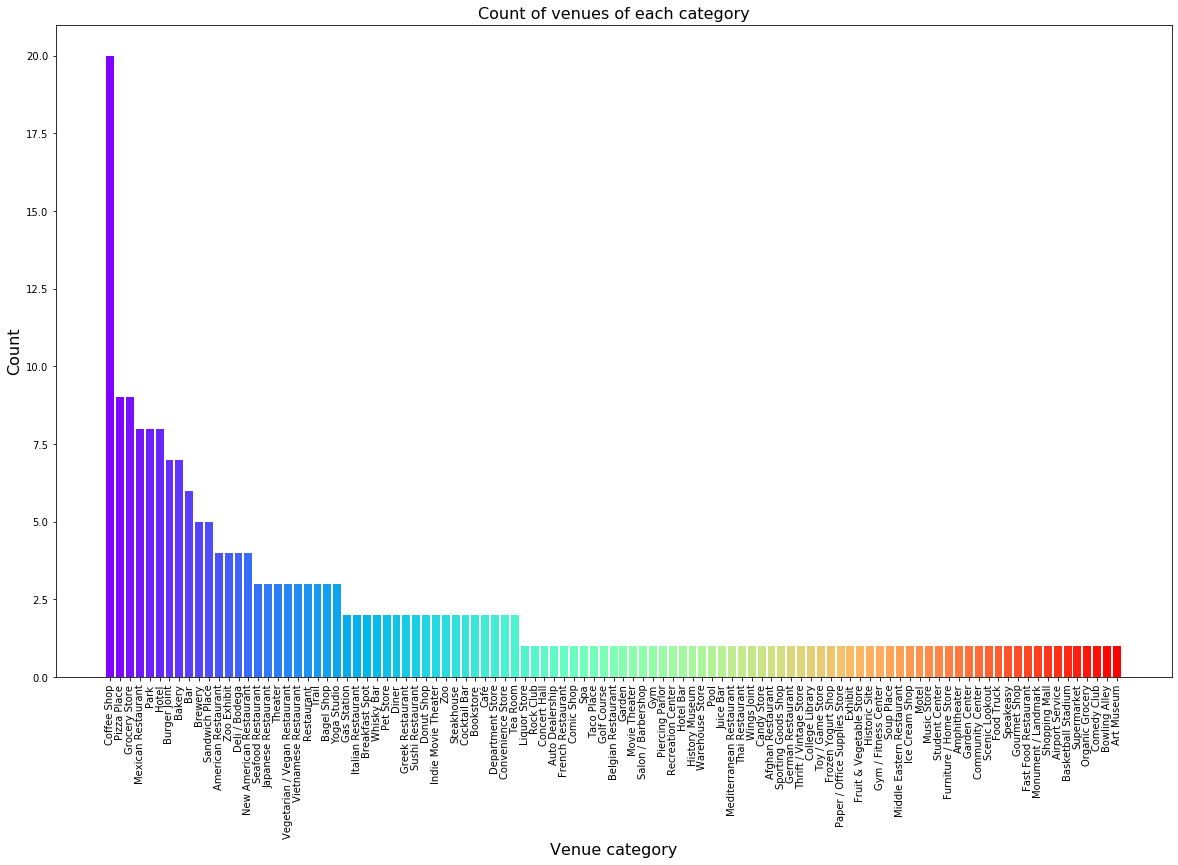

In [11]:
venue_distribution = foursquare_venues['categories'].value_counts()
colors = cm.rainbow(np.linspace(0, 1, len(venue_distribution.index)))
plt.figure(figsize = (20, 12))
plt.xticks(rotation = 90)
plt.xlabel("Venue category", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Count of venues of each category", fontsize = 16)
plt.bar(venue_distribution.index, venue_distribution.values, color = colors)

# Conclusion

In conclusion, the objective of this project was to explore which location in Salt Lake City would be ideal for opening a pizza restaurant. All the venues in SLC were identified using Foursquare API and plotted on a map. The map revealed that there is a certain section of SLC where there are not only any pizza restaurants but not many restaurants in general even though this section of SLC has many attractions such at Vivent Smart Home Arena, the Gateway Mall, City Creek Mall, bars and the LDS Temple. Due to this area not having any pizza places and the lack of other restaurants makes it a prime location for a new pizza restaurant.  
